In [1]:
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from math import pi
from helpers.spot import *
from helpers.misc import *
from time import sleep

In [2]:
# constants
ON_REPEAT = '37i9dQZF1Epfk0vNhDMCzw'
REPEAT_REWIND = '37i9dQZF1EpCchDHzfQcYR'
HIPHOP_NL = '0Fa3x3yr0duQJStzGpnH7w'

METAS = ['name', 'explicit', 'popularity']
FEATURES = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

PLAYLIST = HIPHOP_NL

In [3]:
# seting up
client_id = os.environ.get('SPOT_CLIENT_ID')
secret = os.environ.get('SPOT_SECRET')

auth_manager = SpotifyClientCredentials(client_id, secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
# getting track meta and features
ids = []
track_metas = []
track_features = []

playlist_name = sp.playlist(PLAYLIST, fields='name')['name']
playlist_tracks = get_playlist_tracks(sp, PLAYLIST)

ids = parse_ids(playlist_tracks)
track_metas = parse_metas(playlist_tracks, METAS)
track_features_mess = get_audio_features(sp, ids)
# need to flatten the track_features list
track_features_mess = [item for sublist in track_features_mess for item in sublist]
track_features = parse_features(track_features_mess, FEATURES)

In [8]:
# data parsing
dict_data = dict((key, []) for key in (METAS+FEATURES))

for meta, features in zip(track_metas, track_features):
    mf = meta + features
    for key, value in zip(dict_data.keys(), mf):
        dict_data[key].append(value)

data = pd.DataFrame.from_dict(dict_data)
num_data = data.iloc[:,2:]

# save data
data.to_csv(path_or_buf=f'data/{playlist_name}.csv')

In [23]:
num_data

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.774194,0.672326,0.723122,0.636364,0.806206,1.0,0.175109,0.248908,0.000000,0.411444,0.510717,0.320670
1,0.387097,0.551783,0.759941,0.909091,0.782709,0.0,0.304149,0.065082,0.000000,0.246866,0.592985,0.620913
2,0.709677,0.640068,0.818851,0.909091,0.822841,0.0,0.200434,0.168837,0.000000,0.128065,0.861442,0.271222
3,0.451613,0.246180,0.642121,0.090909,0.733179,1.0,0.444042,0.075345,0.000000,0.144414,0.374323,0.227285
4,0.629032,0.517827,0.627393,0.090909,0.642697,1.0,0.059334,0.204925,0.434307,0.093188,0.152414,0.267806
...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.000000,0.594228,0.544919,1.000000,0.682829,0.0,0.540521,0.314318,0.000000,0.073678,0.506387,0.892055
408,0.000000,0.830221,0.569956,0.909091,0.573027,1.0,0.208876,0.024595,0.000000,0.135695,0.415458,0.339344
409,0.580645,0.838710,0.525773,0.000000,0.846188,1.0,0.257115,0.000424,0.000000,0.171662,0.745616,0.446062
410,0.580645,0.663837,0.952872,0.090909,0.807474,1.0,0.206464,0.108163,0.000000,0.331880,0.670924,0.501605


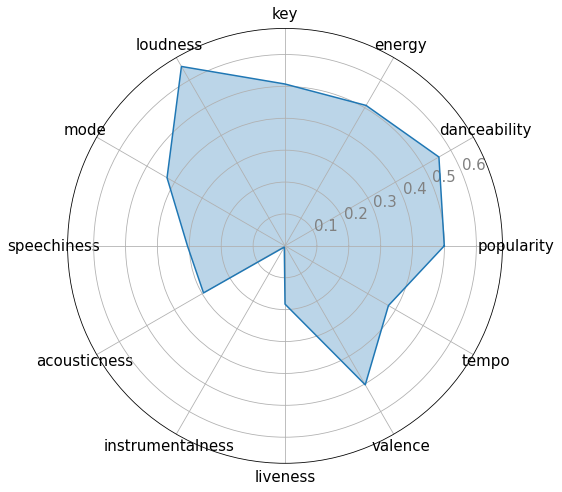

In [16]:
num_data.loc[:] = MinMaxScaler().fit_transform(num_data.loc[:])

# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(num_data.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(num_data.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()